In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem40.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem48.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem22.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem1.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem45.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem31.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem0.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem16.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem44.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem15.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem12.jpg
/kaggle/input/ad4cls-or

In [2]:
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# PyTorch ve Torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader

# Model kütüphaneleri
import timm

# Veri işleme ve makine öğrenmesi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_dir = "/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25"
non_dirs = ["/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/01_non","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01/01_non","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test/01_non"]
very_dirs = ["/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/02_very","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01/02_very","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test/02_very"]
mild_dirs = ["/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/03_mild","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01/03_mild","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test/03_mild"]
mode_dirs = ["/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01/04_mode","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test/04_mode"]

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0], std=[1.0]),
    transforms.Grayscale(num_output_channels=1)
])

data = []
labels = []


Using device: cuda


In [4]:
for subdir in non_dirs:
    non_path = os.path.join(data_dir, subdir)
    if os.path.exists(non_path):
        for img_name in os.listdir(non_path):
            img_path = os.path.join(non_path, img_name)
            data.append(img_path)
            labels.append(0)

for subdir in very_dirs:
    very_path = os.path.join(data_dir, subdir)
    if os.path.exists(very_path):
        for img_name in os.listdir(very_path):
            img_path = os.path.join(very_path, img_name)
            data.append(img_path)
            labels.append(1)

for subdir in mild_dirs:
    mild_path = os.path.join(data_dir, subdir)
    if os.path.exists(mild_path):
        for img_name in os.listdir(mild_path):
            img_path = os.path.join(mild_path, img_name)
            data.append(img_path)
            labels.append(2)

for subdir in mode_dirs:
    mode_path = os.path.join(data_dir, subdir)
    if os.path.exists(mode_path):
        for img_name in os.listdir(mode_path):
            img_path = os.path.join(mode_path, img_name)
            data.append(img_path)
            labels.append(3)

print(f"Toal number of non images: {labels.count(0)}")
print(f"Total number of very mild images: {labels.count(1)}")
print(f"Toal number of mild images: {labels.count(2)}")
print(f"Total number of mode images: {labels.count(3)}")

Toal number of non images: 3200
Total number of very mild images: 2240
Toal number of mild images: 896
Total number of mode images: 64


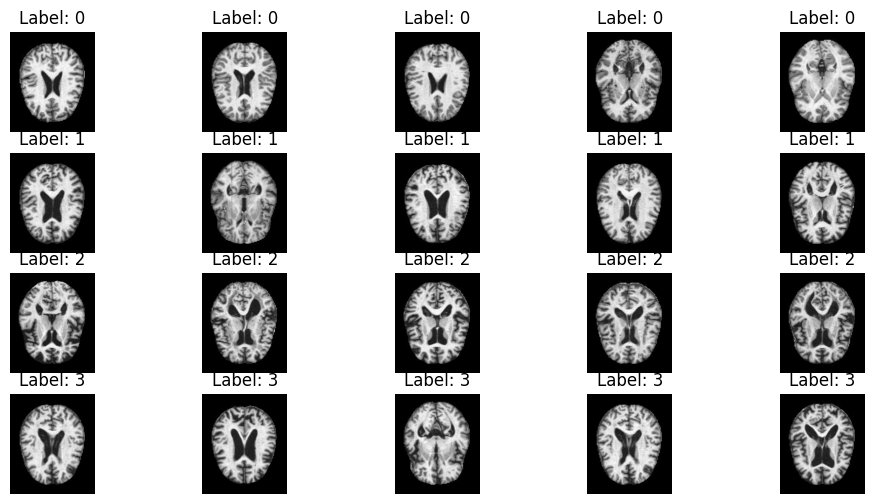

In [5]:
label_0_imgs = [data[i] for i in range(len(data)) if labels[i] == 0]
label_1_imgs = [data[i] for i in range(len(data)) if labels[i] == 1]
label_2_imgs = [data[i] for i in range(len(data)) if labels[i] == 2]
label_3_imgs = [data[i] for i in range(len(data)) if labels[i] == 3]

sample_0 = random.sample(label_0_imgs, min(5, len(label_0_imgs)))
sample_1 = random.sample(label_1_imgs, min(5, len(label_1_imgs)))
sample_2 = random.sample(label_2_imgs, min(5, len(label_2_imgs)))
sample_3 = random.sample(label_3_imgs, min(5, len(label_3_imgs)))

sample_images = sample_0 + sample_1 + sample_2 + sample_3
sample_labels = [0] * len(sample_0) + [1] * len(sample_1) + [2] * len(sample_2) + [3] * len(sample_3)

fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = Image.open(sample_images[i])
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {sample_labels[i]}")
    ax.axis("off")
plt.show()

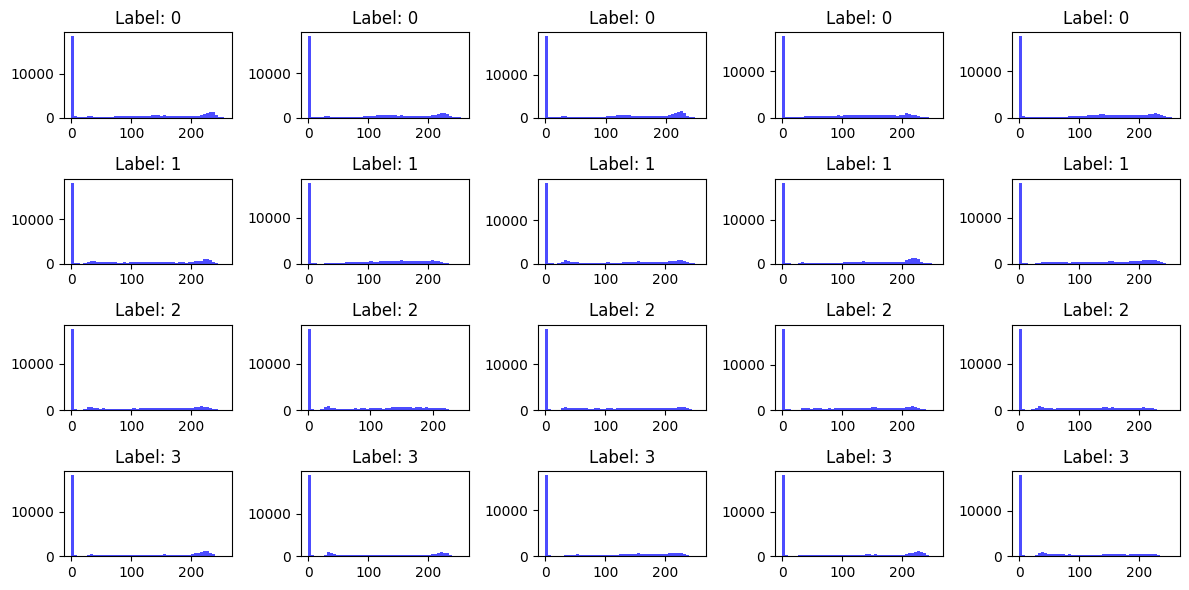

Görüntü 1 - Label 0: Ortalama = 0.300, Std Sapma = 0.357
Görüntü 2 - Label 0: Ortalama = 0.302, Std Sapma = 0.348
Görüntü 3 - Label 0: Ortalama = 0.304, Std Sapma = 0.357
Görüntü 4 - Label 0: Ortalama = 0.288, Std Sapma = 0.318
Görüntü 5 - Label 0: Ortalama = 0.331, Std Sapma = 0.352
Görüntü 6 - Label 1: Ortalama = 0.278, Std Sapma = 0.340
Görüntü 7 - Label 1: Ortalama = 0.289, Std Sapma = 0.316
Görüntü 8 - Label 1: Ortalama = 0.277, Std Sapma = 0.342
Görüntü 9 - Label 1: Ortalama = 0.308, Std Sapma = 0.355
Görüntü 10 - Label 1: Ortalama = 0.299, Std Sapma = 0.340
Görüntü 11 - Label 2: Ortalama = 0.282, Std Sapma = 0.331
Görüntü 12 - Label 2: Ortalama = 0.260, Std Sapma = 0.303
Görüntü 13 - Label 2: Ortalama = 0.276, Std Sapma = 0.330
Görüntü 14 - Label 2: Ortalama = 0.280, Std Sapma = 0.324
Görüntü 15 - Label 2: Ortalama = 0.258, Std Sapma = 0.303
Görüntü 16 - Label 3: Ortalama = 0.296, Std Sapma = 0.350
Görüntü 17 - Label 3: Ortalama = 0.258, Std Sapma = 0.331
Görüntü 18 - Label 3: O

In [6]:
fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = Image.open(sample_images[i]).convert("L")
    img_np = np.array(img).flatten()
    ax.hist(img_np, bins=50, color='blue', alpha=0.7)
    ax.set_title(f"Label: {sample_labels[i]}")
plt.tight_layout()
plt.show()

for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    img_np = np.array(img) / 255.0
    mean = np.mean(img_np)
    std = np.std(img_np)
    print(f"Görüntü {i+1} - Label {sample_labels[i]}: Ortalama = {mean:.3f}, Std Sapma = {std:.3f}")

In [7]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class BrainHemorrhageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Klasörleri (sınıfları) oku
        for label, class_name in enumerate(sorted(os.listdir(root_dir))):
            class_path = os.path.join(root_dir, class_name)
            if os.path.isdir(class_path):
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    self.image_paths.append(img_path)
                    self.labels.append(label)


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Griye çevir
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Dönüşümleri tanımla
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resimleri 224x224 boyutuna getir
    transforms.ToTensor(),
])

# Datasetleri oluştur
train_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01", transform=transform)
val_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01", transform=transform)
test_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test", transform=transform)

# DataLoader'ları oluştur
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Veri seti büyüklüklerini yazdır
print(f"Eğitim Seti: {len(train_dataset)} görüntü")
print(f"Validasyon Seti: {len(val_dataset)} görüntü")
print(f"Test Seti: {len(test_dataset)} görüntü")


Eğitim Seti: 4098 görüntü
Validasyon Seti: 1023 görüntü
Test Seti: 1279 görüntü


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

model = model.to(device)

class_counts = np.bincount(labels)
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.AdamW(model.parameters(), lr=0.0001)
num_epochs=25

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 230MB/s]


In [9]:
print(class_weights)
print(class_counts)
print(criterion)

tensor([0.0003, 0.0004, 0.0011, 0.0156])
[3200 2240  896   64]
CrossEntropyLoss()


In [10]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):

    best_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1) 
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_loss = val_loss / len(val_loader)
        val_acc = correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        # En iyi modeli kaydet
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_model_ad4cls_org_Res18.pth")
            print("Best model saved!")

    print("Training complete!")

In [11]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/25: Train Loss: 0.9020, Train Acc: 0.5913, Val Loss: 0.6371, Val Acc: 0.7155
Best model saved!
Epoch 2/25: Train Loss: 0.2874, Train Acc: 0.8746, Val Loss: 0.3881, Val Acc: 0.8504
Best model saved!
Epoch 3/25: Train Loss: 0.1244, Train Acc: 0.9461, Val Loss: 0.1583, Val Acc: 0.9365
Best model saved!
Epoch 4/25: Train Loss: 0.0926, Train Acc: 0.9636, Val Loss: 0.3396, Val Acc: 0.8641
Epoch 5/25: Train Loss: 0.0295, Train Acc: 0.9907, Val Loss: 0.1727, Val Acc: 0.9433
Best model saved!
Epoch 6/25: Train Loss: 0.1132, Train Acc: 0.9519, Val Loss: 0.1914, Val Acc: 0.9296
Epoch 7/25: Train Loss: 0.0722, Train Acc: 0.9712, Val Loss: 0.0942, Val Acc: 0.9687
Best model saved!
Epoch 8/25: Train Loss: 0.0174, Train Acc: 0.9956, Val Loss: 0.0719, Val Acc: 0.9707
Best model saved!
Epoch 9/25: Train Loss: 0.0834, Train Acc: 0.9702, Val Loss: 0.3531, Val Acc: 0.8895
Epoch 10/25: Train Loss: 0.1178, Train Acc: 0.9495, Val Loss: 0.1338, Val Acc: 0.9492
Epoch 11/25: Train Loss: 0.1813, Train Ac

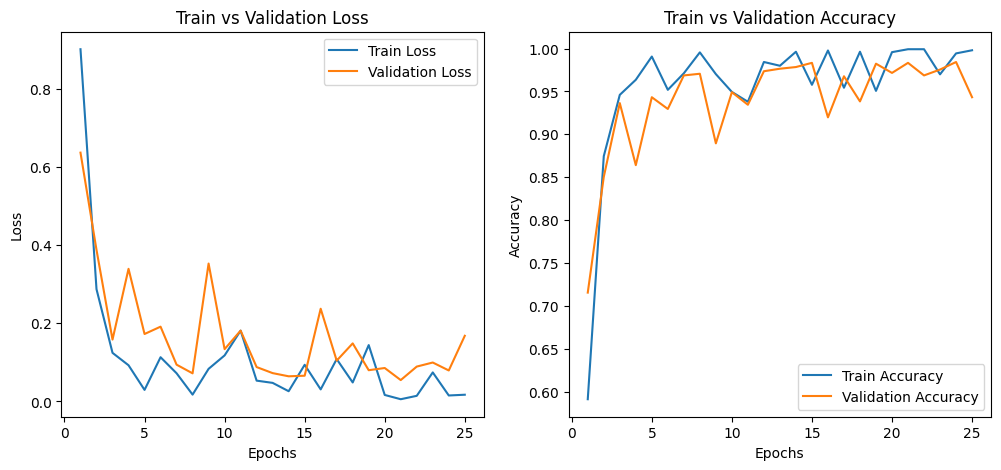

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')

plt.show()

Test Accuracy: 0.6888
Test Precision: 0.7142
Test Recall: 0.6888
Test F1 Score: 0.6608

Classification Report:
               precision    recall  f1-score   support

         non       0.66      0.95      0.78       640
        very       0.78      0.46      0.58       448
        mild       0.75      0.31      0.44       179
        mode       0.89      0.67      0.76        12

    accuracy                           0.69      1279
   macro avg       0.77      0.60      0.64      1279
weighted avg       0.71      0.69      0.66      1279



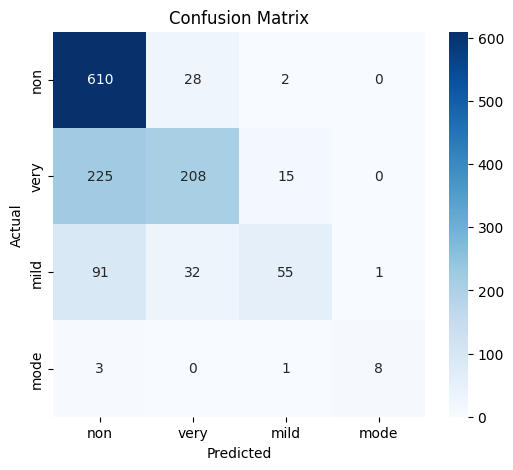

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(num_ftrs, 4)
model.load_state_dict(torch.load("best_model_ad4cls_org_Res18.pth"))

model = model.to(device)
model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=['non', 'very','mild','mode'])

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non', 'very','mild','mode'], yticklabels=['non', 'very','mild','mode'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
torch.cuda.empty_cache()

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem40.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem48.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem22.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem1.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem45.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem31.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem0.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem16.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem44.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem15.jpg
/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode/moderateDem12.jpg
/kaggle/input/ad4cls-or

In [16]:
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# PyTorch ve Torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader

# Model kütüphaneleri
import timm

# Veri işleme ve makine öğrenmesi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data_dir = "/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25"
non_dirs = ["/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/01_non","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01/01_non","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test/01_non"]
very_dirs = ["/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/02_very","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01/02_very","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test/02_very"]
mild_dirs = ["/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/03_mild","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01/03_mild","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test/03_mild"]
mode_dirs = ["/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01/04_mode","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01/04_mode","/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test/04_mode"]

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0], std=[1.0]),
    transforms.Grayscale(num_output_channels=1)
])

data = []
labels = []

Using device: cuda


In [18]:
for subdir in non_dirs:
    non_path = os.path.join(data_dir, subdir)
    if os.path.exists(non_path):
        for img_name in os.listdir(non_path):
            img_path = os.path.join(non_path, img_name)
            data.append(img_path)
            labels.append(0)

for subdir in very_dirs:
    very_path = os.path.join(data_dir, subdir)
    if os.path.exists(very_path):
        for img_name in os.listdir(very_path):
            img_path = os.path.join(very_path, img_name)
            data.append(img_path)
            labels.append(1)

for subdir in mild_dirs:
    mild_path = os.path.join(data_dir, subdir)
    if os.path.exists(mild_path):
        for img_name in os.listdir(mild_path):
            img_path = os.path.join(mild_path, img_name)
            data.append(img_path)
            labels.append(2)

for subdir in mode_dirs:
    mode_path = os.path.join(data_dir, subdir)
    if os.path.exists(mode_path):
        for img_name in os.listdir(mode_path):
            img_path = os.path.join(mode_path, img_name)
            data.append(img_path)
            labels.append(3)

print(f"Toal number of non images: {labels.count(0)}")
print(f"Total number of very mild images: {labels.count(1)}")
print(f"Toal number of mild images: {labels.count(2)}")
print(f"Total number of mode images: {labels.count(3)}")

Toal number of non images: 3200
Total number of very mild images: 2240
Toal number of mild images: 896
Total number of mode images: 64


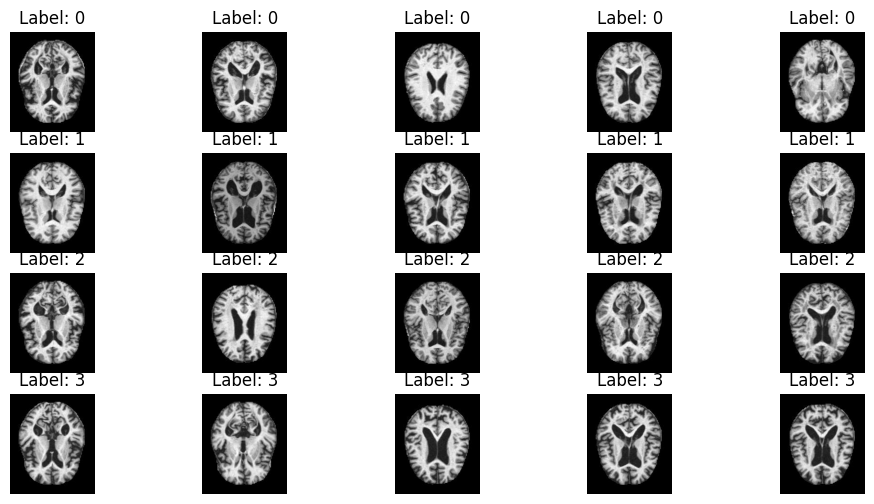

In [19]:
label_0_imgs = [data[i] for i in range(len(data)) if labels[i] == 0]
label_1_imgs = [data[i] for i in range(len(data)) if labels[i] == 1]
label_2_imgs = [data[i] for i in range(len(data)) if labels[i] == 2]
label_3_imgs = [data[i] for i in range(len(data)) if labels[i] == 3]

sample_0 = random.sample(label_0_imgs, min(5, len(label_0_imgs)))
sample_1 = random.sample(label_1_imgs, min(5, len(label_1_imgs)))
sample_2 = random.sample(label_2_imgs, min(5, len(label_2_imgs)))
sample_3 = random.sample(label_3_imgs, min(5, len(label_3_imgs)))

sample_images = sample_0 + sample_1 + sample_2 + sample_3
sample_labels = [0] * len(sample_0) + [1] * len(sample_1) + [2] * len(sample_2) + [3] * len(sample_3)

fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = Image.open(sample_images[i])
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {sample_labels[i]}")
    ax.axis("off")
plt.show()

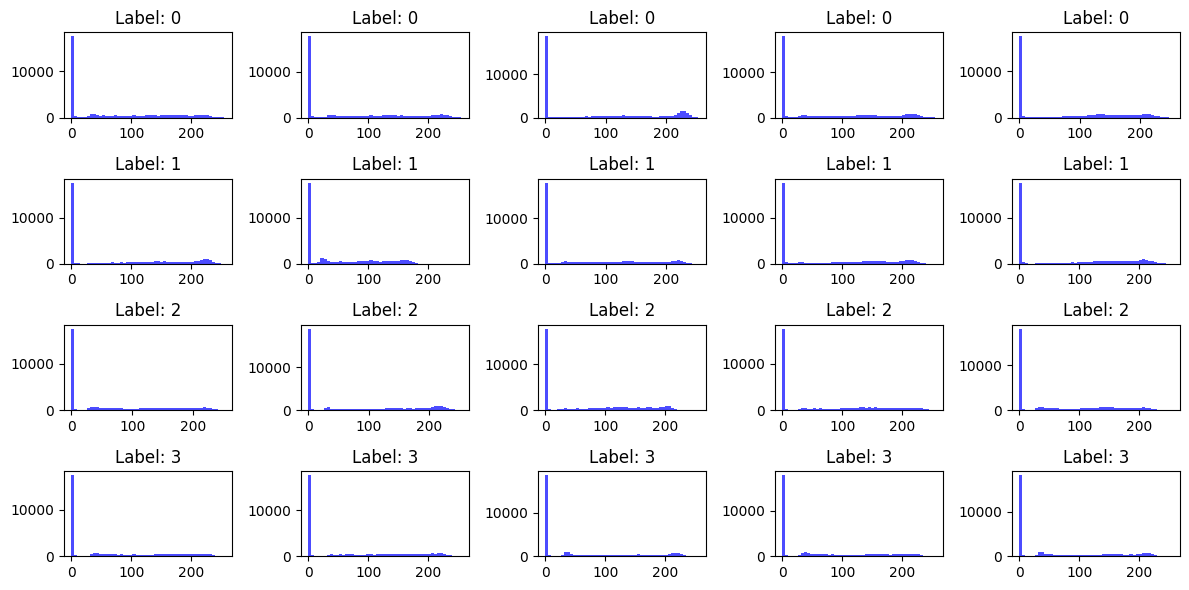

Görüntü 1 - Label 0: Ortalama = 0.264, Std Sapma = 0.312
Görüntü 2 - Label 0: Ortalama = 0.277, Std Sapma = 0.324
Görüntü 3 - Label 0: Ortalama = 0.310, Std Sapma = 0.365
Görüntü 4 - Label 0: Ortalama = 0.281, Std Sapma = 0.331
Görüntü 5 - Label 0: Ortalama = 0.302, Std Sapma = 0.329
Görüntü 6 - Label 1: Ortalama = 0.317, Std Sapma = 0.351
Görüntü 7 - Label 1: Ortalama = 0.197, Std Sapma = 0.238
Görüntü 8 - Label 1: Ortalama = 0.273, Std Sapma = 0.321
Görüntü 9 - Label 1: Ortalama = 0.293, Std Sapma = 0.329
Görüntü 10 - Label 1: Ortalama = 0.304, Std Sapma = 0.334
Görüntü 11 - Label 2: Ortalama = 0.269, Std Sapma = 0.316
Görüntü 12 - Label 2: Ortalama = 0.277, Std Sapma = 0.341
Görüntü 13 - Label 2: Ortalama = 0.268, Std Sapma = 0.302
Görüntü 14 - Label 2: Ortalama = 0.283, Std Sapma = 0.322
Görüntü 15 - Label 2: Ortalama = 0.253, Std Sapma = 0.302
Görüntü 16 - Label 3: Ortalama = 0.270, Std Sapma = 0.316
Görüntü 17 - Label 3: Ortalama = 0.284, Std Sapma = 0.324
Görüntü 18 - Label 3: O

In [20]:
fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = Image.open(sample_images[i]).convert("L")
    img_np = np.array(img).flatten()
    ax.hist(img_np, bins=50, color='blue', alpha=0.7)
    ax.set_title(f"Label: {sample_labels[i]}")
plt.tight_layout()
plt.show()

for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    img_np = np.array(img) / 255.0
    mean = np.mean(img_np)
    std = np.std(img_np)
    print(f"Görüntü {i+1} - Label {sample_labels[i]}: Ortalama = {mean:.3f}, Std Sapma = {std:.3f}")

In [21]:
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class BrainHemorrhageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Klasörleri (sınıfları) oku
        for label, class_name in enumerate(sorted(os.listdir(root_dir))):
            class_path = os.path.join(root_dir, class_name)
            if os.path.isdir(class_path):
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    self.image_paths.append(img_path)
                    self.labels.append(label)


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")  # Griye çevir
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Dönüşümleri tanımla
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resimleri 224x224 boyutuna getir
    transforms.ToTensor(),
])

# Datasetleri oluştur
train_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/train01", transform=transform)
val_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/valid01", transform=transform)
test_dataset = BrainHemorrhageDataset("/kaggle/input/ad4cls-org-dataset/AD4_class_org_20may25/test", transform=transform)

# DataLoader'ları oluştur
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Veri seti büyüklüklerini yazdır
print(f"Eğitim Seti: {len(train_dataset)} görüntü")
print(f"Validasyon Seti: {len(val_dataset)} görüntü")
print(f"Test Seti: {len(test_dataset)} görüntü")


Eğitim Seti: 4098 görüntü
Validasyon Seti: 1023 görüntü
Test Seti: 1279 görüntü


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

model = model.to(device)

class_counts = np.bincount(labels)
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.AdamW(model.parameters(), lr=0.0001)
num_epochs=25

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 220MB/s]


In [23]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):

    best_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_loss = val_loss / len(val_loader)
        val_acc = correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        # En iyi modeli kaydet
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_model_ad4cls_org_Res50.pth")
            print("Best model saved!")

    print("Training complete!")

In [24]:
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/25: Train Loss: 0.9097, Train Acc: 0.6125, Val Loss: 0.7223, Val Acc: 0.6823
Best model saved!
Epoch 2/25: Train Loss: 0.3243, Train Acc: 0.8477, Val Loss: 0.2514, Val Acc: 0.9071
Best model saved!
Epoch 3/25: Train Loss: 0.0817, Train Acc: 0.9666, Val Loss: 0.1616, Val Acc: 0.9394
Best model saved!
Epoch 4/25: Train Loss: 0.0853, Train Acc: 0.9754, Val Loss: 0.6926, Val Acc: 0.7537
Epoch 5/25: Train Loss: 0.1423, Train Acc: 0.9363, Val Loss: 0.1000, Val Acc: 0.9677
Best model saved!
Epoch 6/25: Train Loss: 0.0297, Train Acc: 0.9910, Val Loss: 0.1285, Val Acc: 0.9521
Epoch 7/25: Train Loss: 0.0431, Train Acc: 0.9841, Val Loss: 0.1468, Val Acc: 0.9433
Epoch 8/25: Train Loss: 0.0713, Train Acc: 0.9819, Val Loss: 0.2075, Val Acc: 0.9218
Epoch 9/25: Train Loss: 0.1528, Train Acc: 0.9327, Val Loss: 0.8322, Val Acc: 0.7097
Epoch 10/25: Train Loss: 0.0439, Train Acc: 0.9856, Val Loss: 0.1431, Val Acc: 0.9433
Epoch 11/25: Train Loss: 0.0290, Train Acc: 0.9924, Val Loss: 0.1400, Val Acc

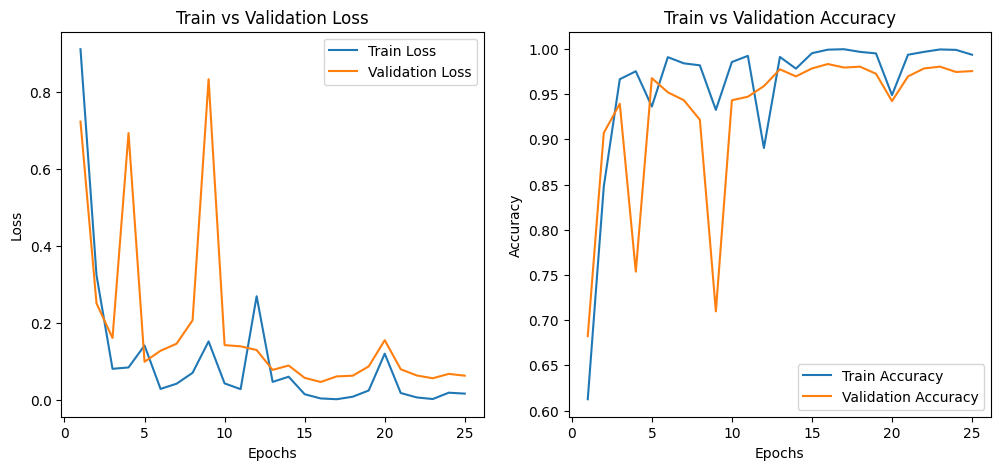

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')

plt.show()

Test Accuracy: 0.7076
Test Precision: 0.7076
Test Recall: 0.7076
Test F1 Score: 0.7022

Classification Report:
               precision    recall  f1-score   support

         non       0.73      0.82      0.77       640
        very       0.66      0.62      0.64       448
        mild       0.72      0.53      0.61       179
        mode       1.00      0.33      0.50        12

    accuracy                           0.71      1279
   macro avg       0.78      0.58      0.63      1279
weighted avg       0.71      0.71      0.70      1279



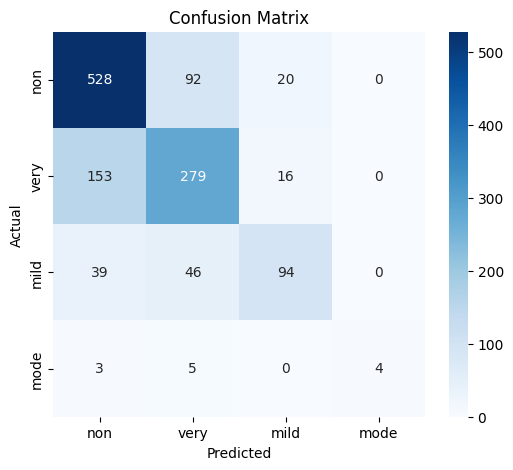

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(num_ftrs, 4)
model.load_state_dict(torch.load("best_model_ad4cls_org_Res50.pth"))

model = model.to(device)
model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=['non', 'very','mild','mode'])

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['non', 'very','mild','mode'], yticklabels=['non', 'very','mild','mode'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()